In [44]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

1. Buscar un conjunto de datos a analizar:

Zarigueyas

In [45]:
df = pd.read_csv("../datos/possum.csv")

In [46]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado: 

In [47]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [48]:
df.set_index('case', inplace=True)

In [49]:
df['Pop'].unique()

array(['Vic', 'other'], dtype=object)

In [50]:
df['Pop'].value_counts()

other    58
Vic      46
Name: Pop, dtype: int64

In [51]:
# site: sitios de muestreo. 

df['site'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [52]:
df.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [53]:
df.describe(include = "O")

,Pop,sex
count,104,104
unique,2,2
top,other,m
freq,58,61


In [54]:
df.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [55]:
df = df.dropna(how='any')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


In [57]:
df.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [58]:
# vamos a cambiar el tipo de "site" y "case" a categoricas, pues no nos sirven como numéricas. 

df[["site"]]=df[["site"]].astype("category")

In [59]:
# cambiamos el tipo de age a int
df[["age"]]=df[["age"]].astype("Int64")

In [60]:
categoricas = df.select_dtypes(include=["object", "category"])
categoricas.head(2) 

,site,Pop,sex
case,,,
1,1,Vic,m
2,1,Vic,f


In [61]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2) 

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,
1,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [62]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Hacemos un boxplot de cada una de nuestras variables numéricas para poder detectar outliers.

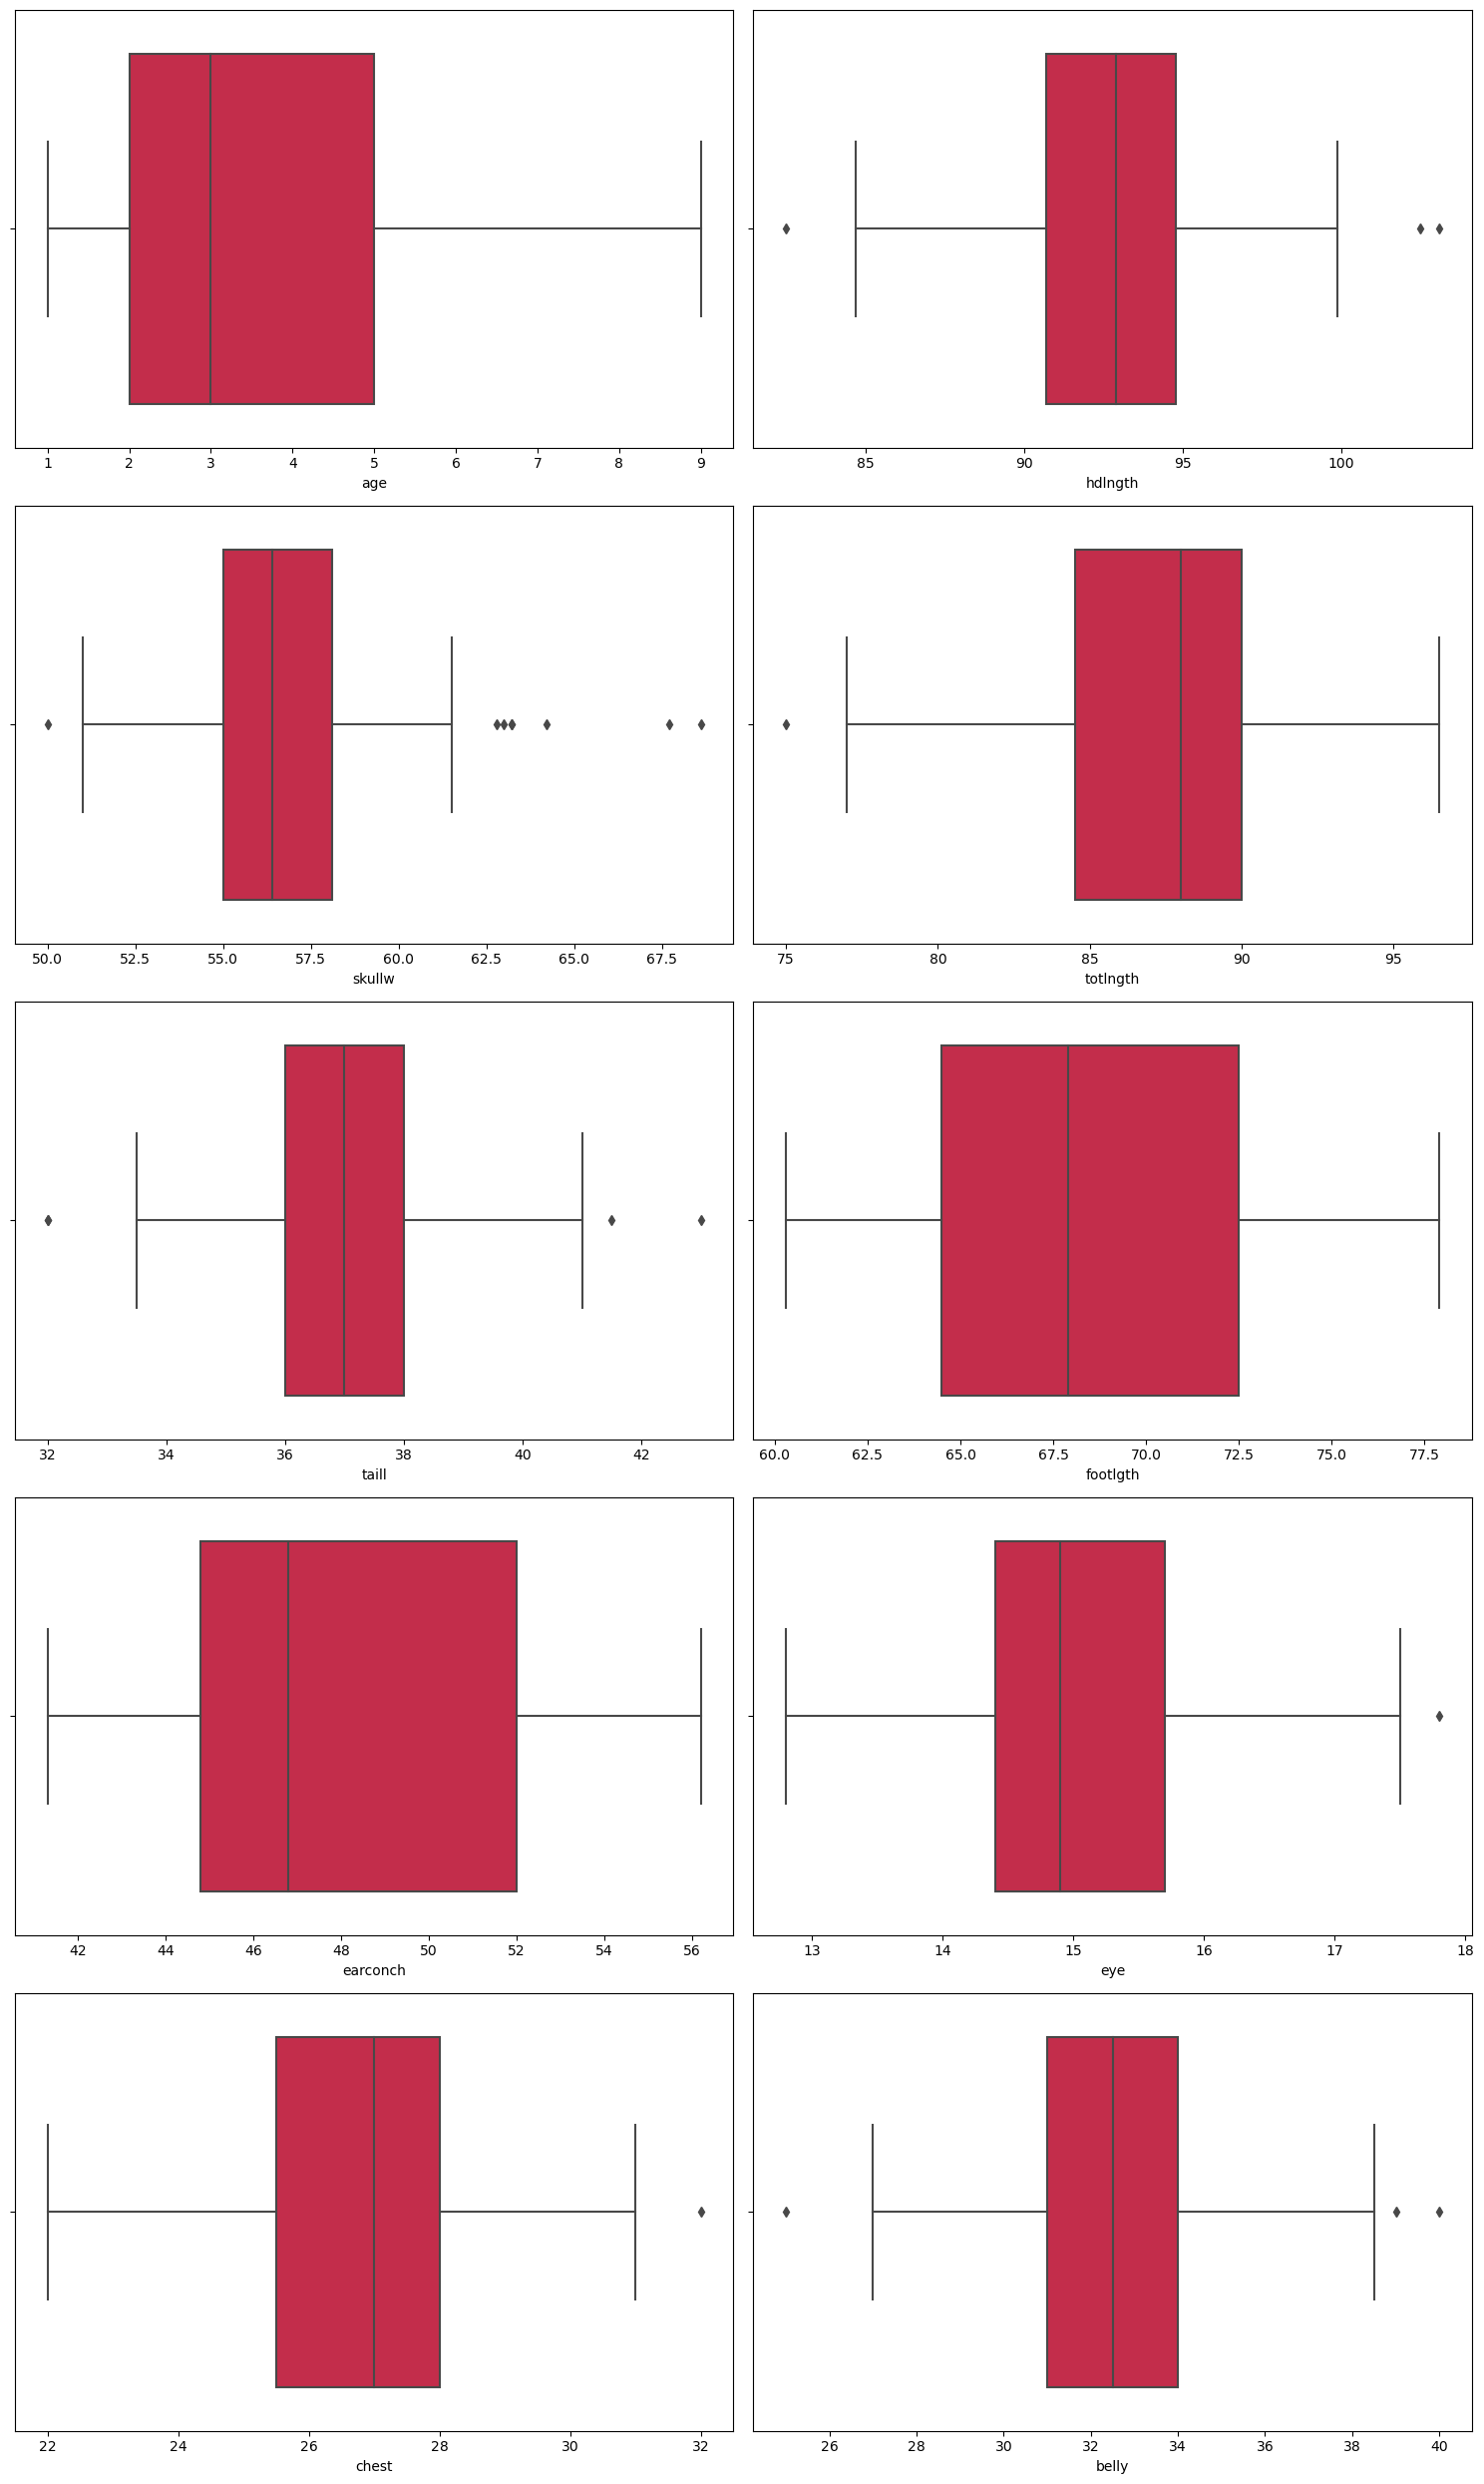

In [63]:
fig, axes = plt.subplots(5, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "crimson"); # para trazar una línea de densidad


plt.tight_layout()

plt.show() 

SKULL: descartamos eliminar outliers en este valor, pues los rangos totales desde el min al max nos parecen correctos. Los que se tectan cómo ouliers son, a nuestro parecer, valores de sujetos reales. 

#### Elegimos como variable respuesta a la variable 'totlngth' que se refiere al largo total del animal. 
#### Nuestro objetivo es descubrir si podemos predecir el tamaño total de la zarigüeya mediante otras variables como el largo de la cabeza o el largo del cráneo. También queremos saber si hay diferencias en la longitud total del cuerpo en nuestros diferentes sitios de muestreo y las distintas poblaciones.

##### Hacemos un boxplot de las diferentes categorías de nuestras variables categóricas. 

In [64]:
categoricas.head(2)

,site,Pop,sex
case,,,
1,1,Vic,m
2,1,Vic,f


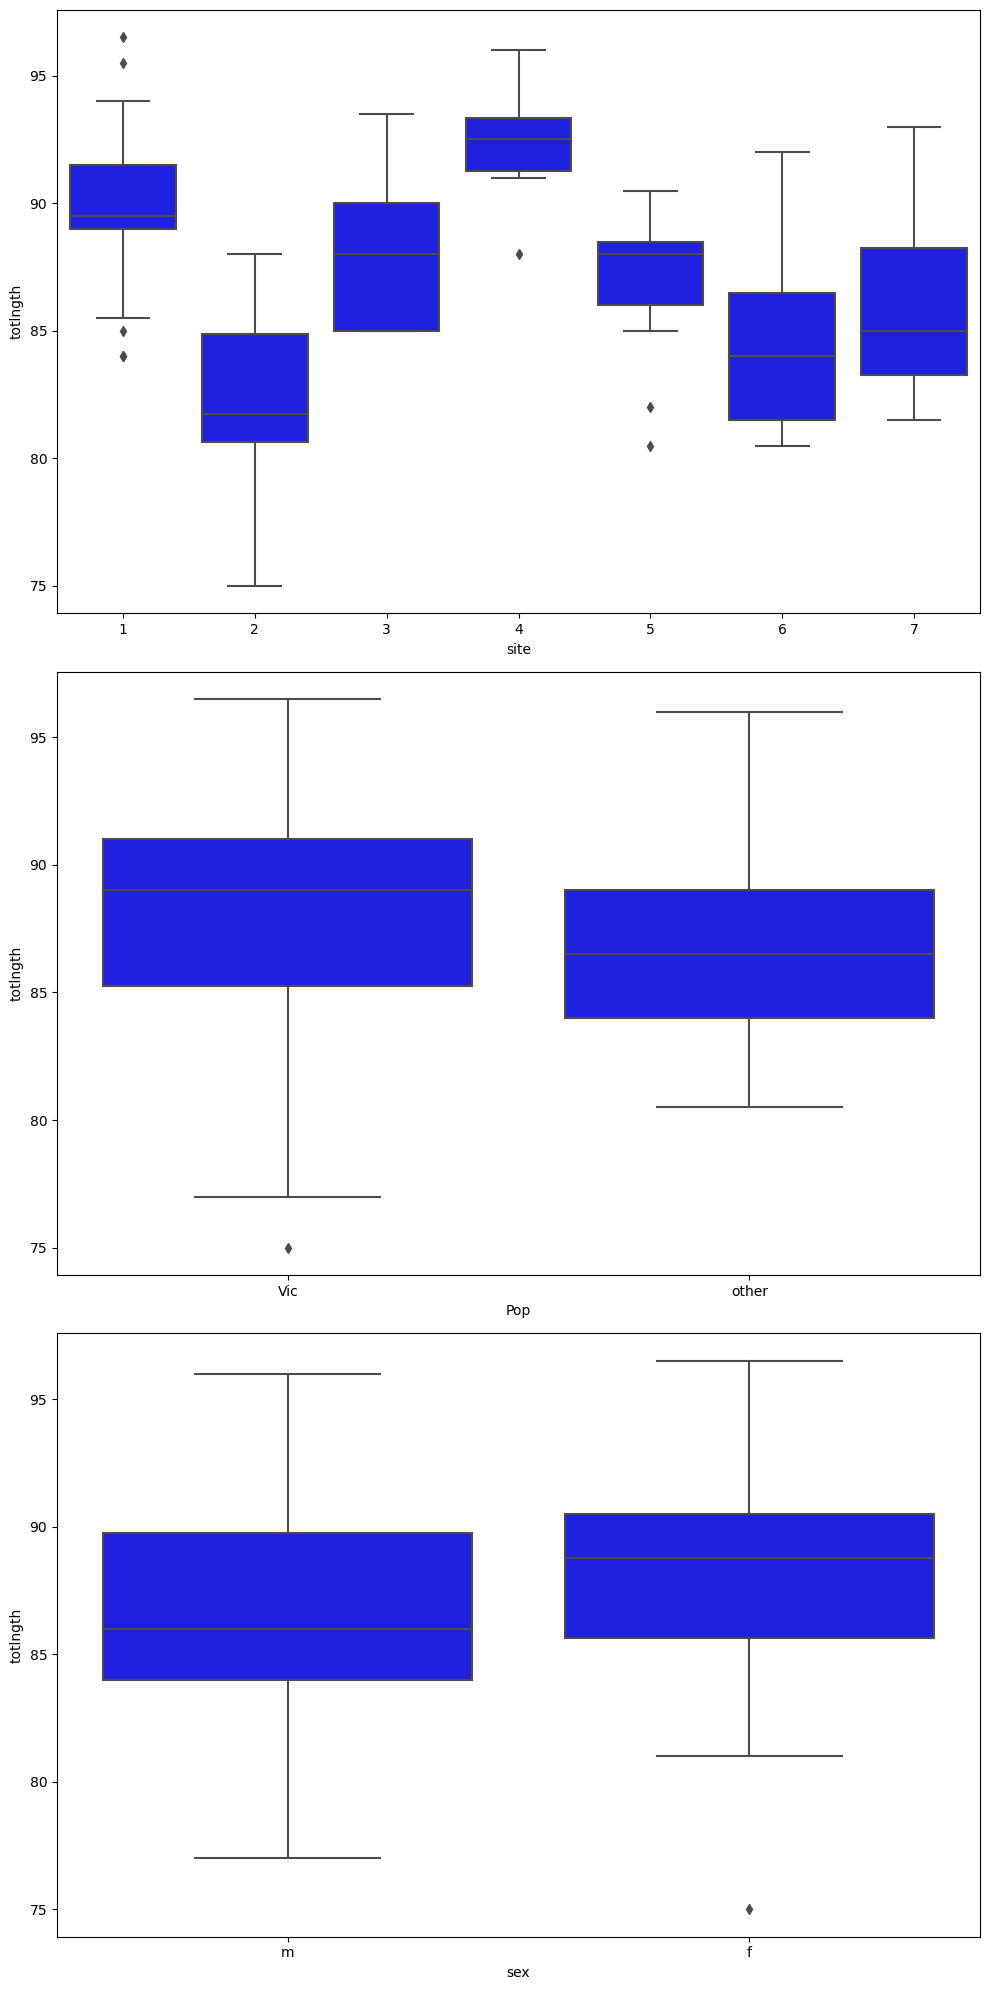

In [65]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))

axes = axes.flat

for indice, columna in enumerate(categoricas.columns):
    sns.boxplot(x = categoricas[columna], y = df['totlngth'], data = df, ax=axes[indice], color = "blue"); # para trazar una línea de densidad


plt.tight_layout()

plt.show() 

En principio, no parecería haber diferencias en el largo total del cuerpo entre sexo o entre poblaciones, pero sí parecen haber diferencias entre sitios de muestreo. 

## Distribución de nuestras variables

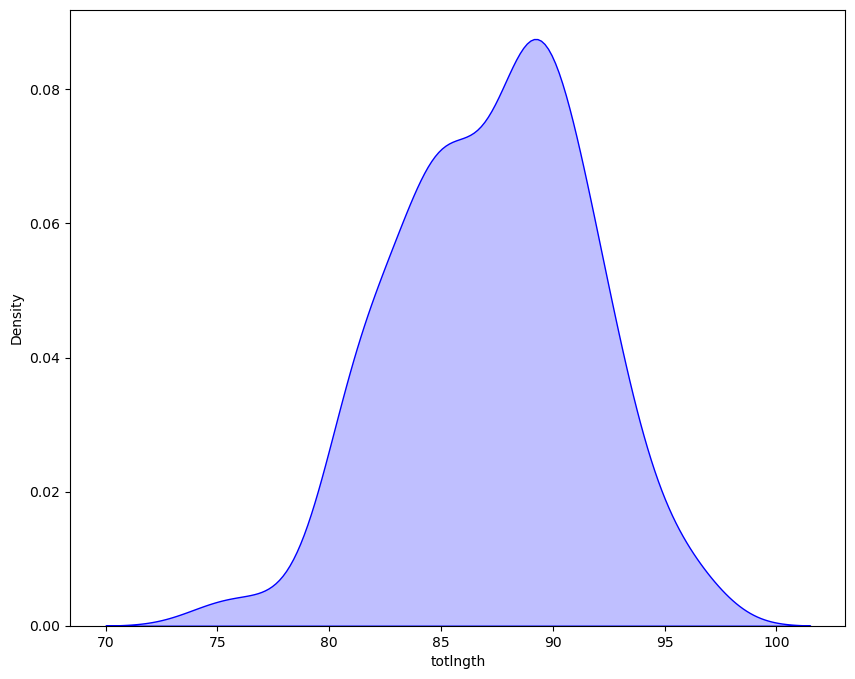

In [66]:
# Vamos a ver visualmente como está distribuida la variable respuesta

sns.distplot(
df['totlngth'], # variable respuesta
hist = False, 
color = "blue", 
kde_kws = {"shade": True, "linewidth": 1}); 

La variable respuesta longitud total ('totlngth') tiene una distribución normal preciosa. 

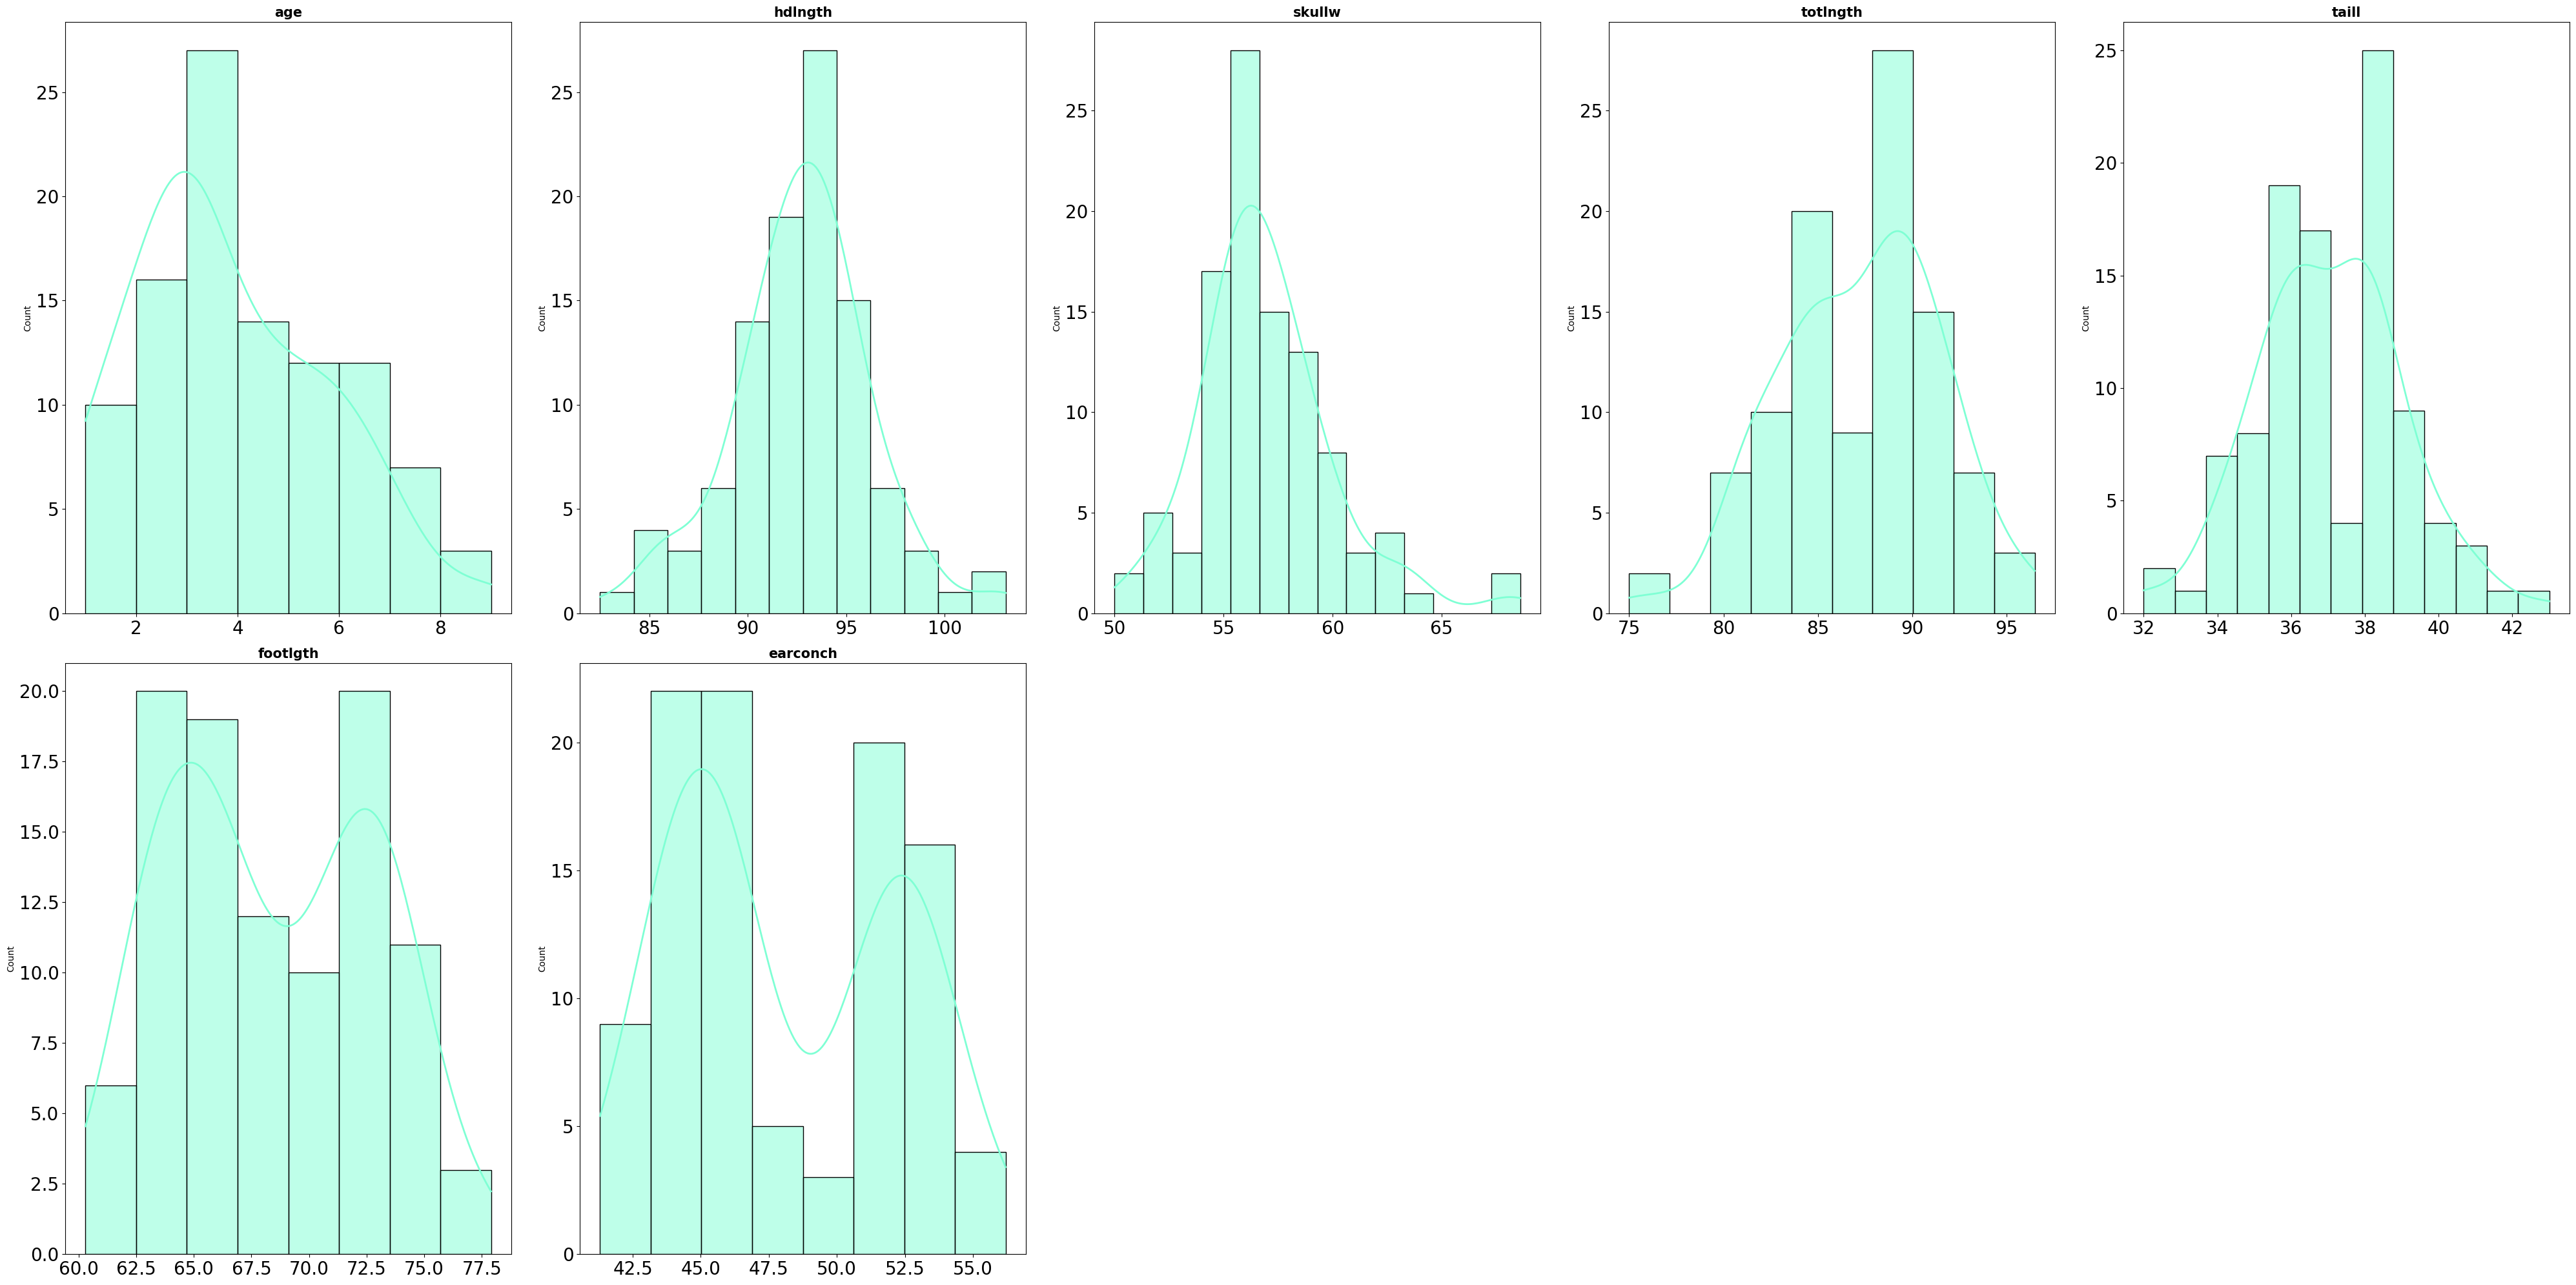

In [67]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (40, 20))


axes = axes.flat


for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df,
    x = colum,
    kde = True, 
    color = "aquamarine", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]); 

Observamos en los histogramas que algunas de nuestras variables, como 'headlngth', parecen seguir una distribución normal clara, mientras que otras como 'footgth' no la tienen. 

## Relación entre nuestra variable respuesta y nuestras variables predictoras

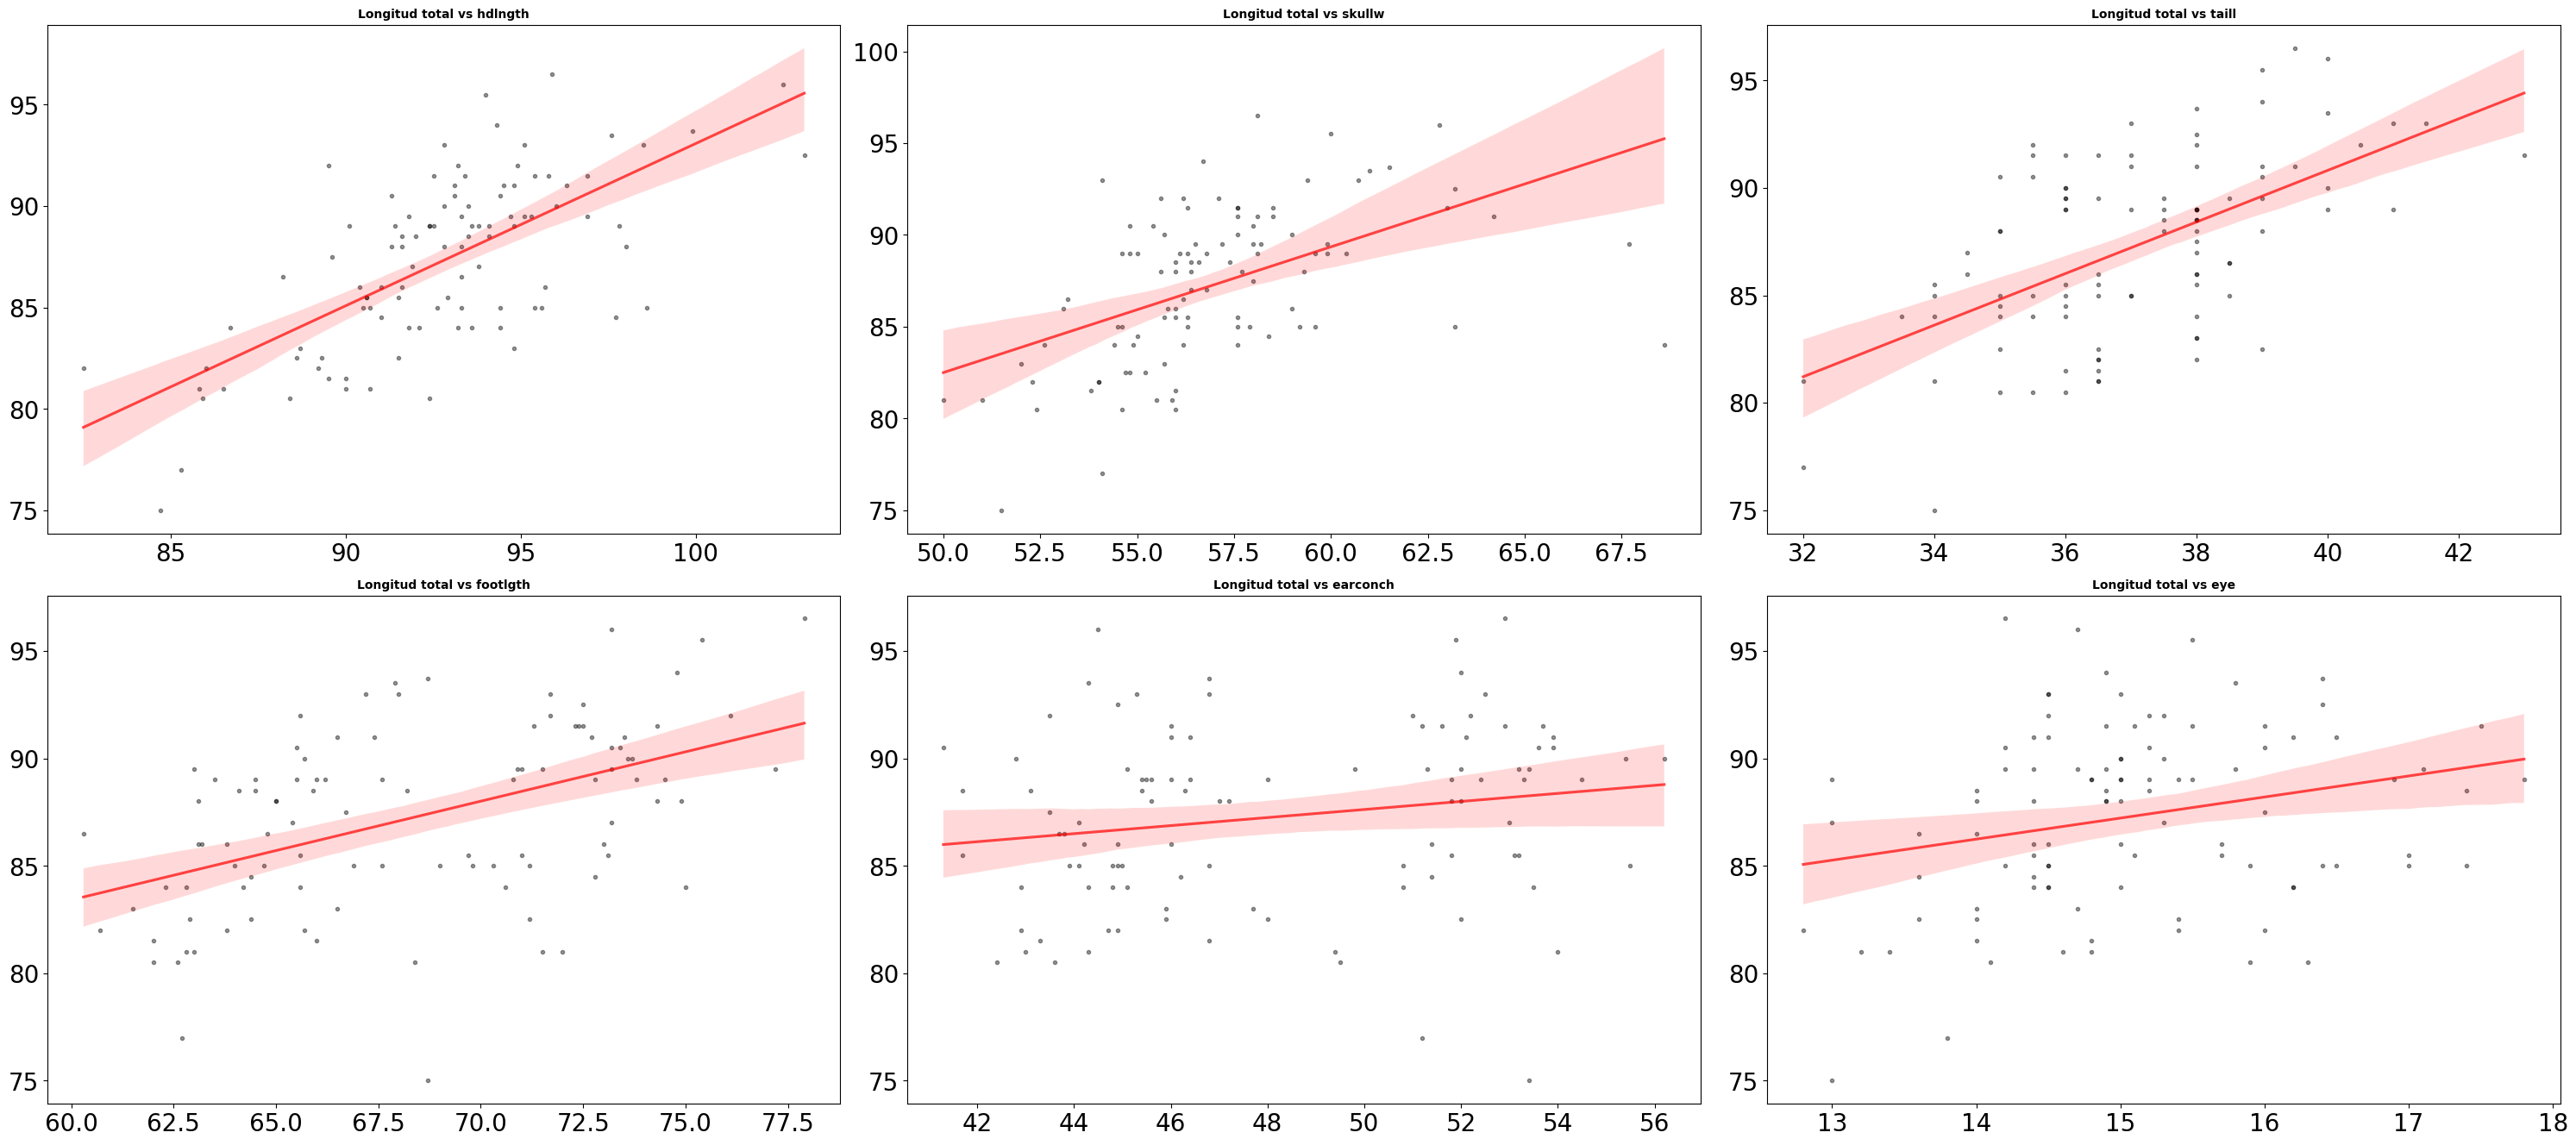

In [68]:
# Gráfico de relación entre variables predictoras y la variable a predecir. 
# ==============================================================================


fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (30, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["totlngth", 'age'])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["totlngth"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Longitud total vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

### Hacemos una matriz de correlación para nuestras variables numéricas

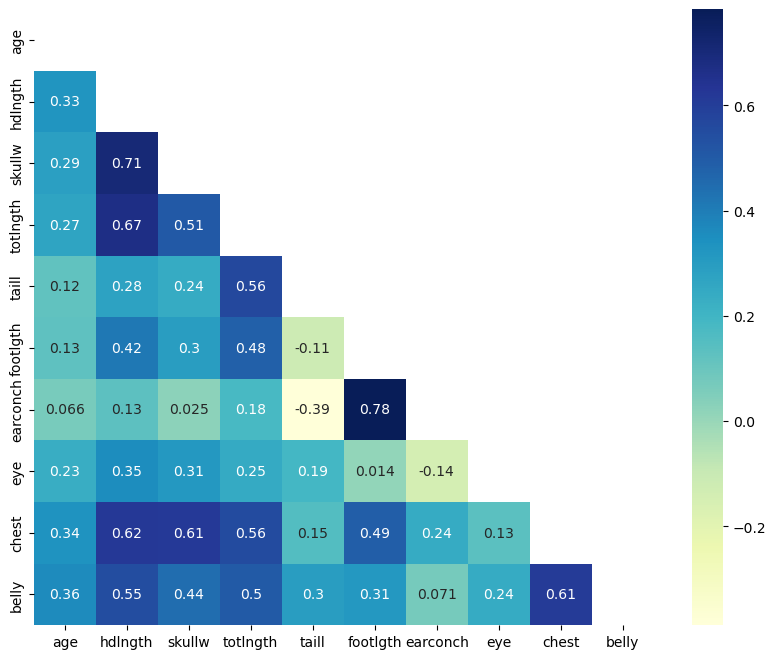

In [69]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

### Variables categóricas

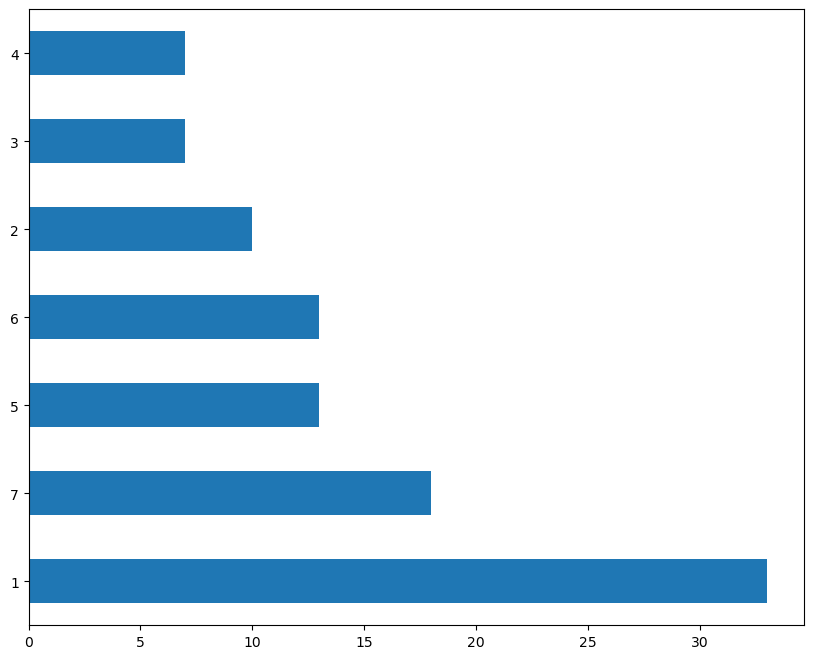

In [70]:
# Hacemos un gráfico de barras para ver la cantidad de zarigüeyas medidas por sitio de muestreo

df['site'].value_counts().plot.barh();

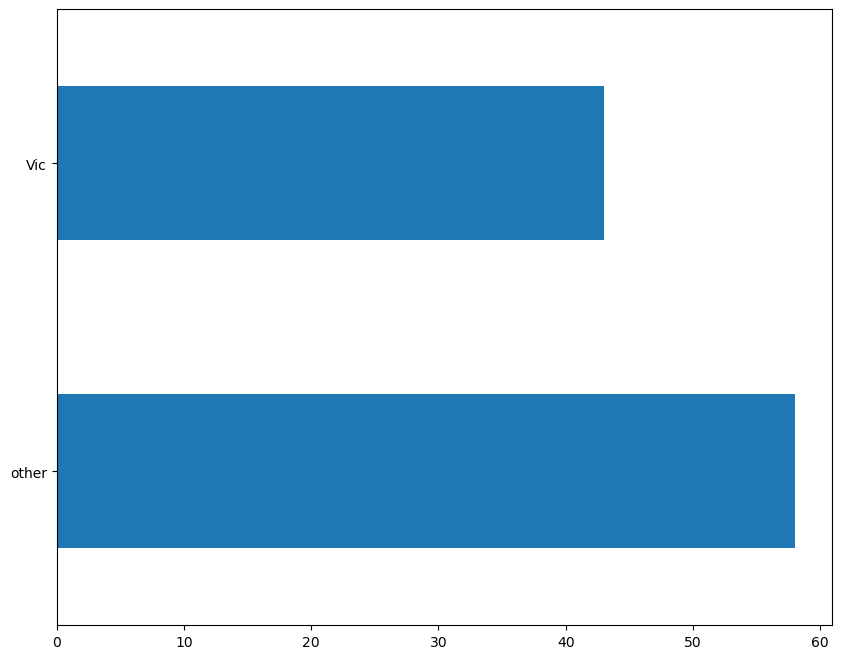

In [71]:
# Hacemos un gráfico de barras para ver la cantidad de zarigüeyas medidas por Población

df['Pop'].value_counts().plot.barh();

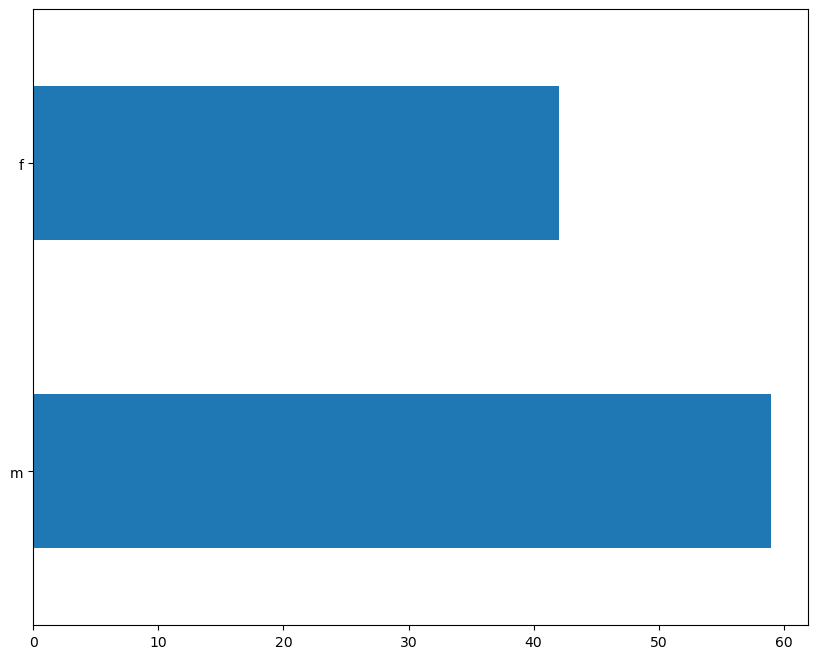

In [72]:
# Hacemos un gráfico de barras para ver la cantidad de zarigüeyas medidas por sexo

df['sex'].value_counts().plot.barh();

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   site      101 non-null    category
 1   Pop       101 non-null    object  
 2   sex       101 non-null    object  
 3   age       101 non-null    Int64   
 4   hdlngth   101 non-null    float64 
 5   skullw    101 non-null    float64 
 6   totlngth  101 non-null    float64 
 7   taill     101 non-null    float64 
 8   footlgth  101 non-null    float64 
 9   earconch  101 non-null    float64 
 10  eye       101 non-null    float64 
 11  chest     101 non-null    float64 
 12  belly     101 non-null    float64 
dtypes: Int64(1), category(1), float64(9), object(2)
memory usage: 10.8+ KB


In [74]:
# Guardamos nuestro data set en un nuevo archivo ya que hemos hecho algunas modificaciones. Hemos cambiado el tipo de dato de case y site a object
# pero no se ha guardado en .csv, tenemos que guardarlo en pickle. 

df.to_csv('../datos/possum_limpio.csv')
df.to_pickle('../datos/possum_limpio.pkl')
